In [1]:
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import os, json, tqdm, re, itertools, nltk, pprint, pickle
from collections import Counter
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import gc

In [2]:
def read_file(file_path):
    all_words_from_files = []
    with open (file_path) as file:
        json_content = json.load(file)
        json_content = json_content["items"]
        item_count = 0
        for item in json_content:
            if item_count < 10:
                item_count += 1
                text_content = re.sub("<.*?>", "", item["textContent"])
                text_content = text_content.replace('-\n', '')
                text_content = text_content.replace("\n", '')
                
#                 print (text_content)
#             text_content = [word for word in text_content if len(word) > 0]
            all_words_from_files.append(text_content)
    
    return all_words_from_files
       
        
def read_all_judgments_from_2018(path):
    all_judgments = []
    for filename in tqdm.tqdm(os.listdir(path)):
        judgments = read_file(path + filename)
        all_judgments.append(judgments)
    return all_judgments

# We need a stream of sentences
def flatten_judgments(words):
    chain = list(itertools.chain(*words))
    result = []
    for judgment in chain:
        for word in judgment:
            result.append(word)
    return result
        

In [3]:
words = read_all_judgments_from_2018("../data/json/")

100%|██████████| 334/334 [00:09<00:00, 35.22it/s]


In [4]:
content = []
for judgment in words:
    for word in judgment:
        content.append(word)
content = " ".join(content)

In [5]:
from nltk.tokenize import TweetTokenizer, sent_tokenize

tokenizer_words = TweetTokenizer(preserve_case=False)
tokens_sentences = [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(content)]
# results = p.map(func, content_chunks)

# for x in tqdm.tqdm(content):
#     result = tokenizer_words.tokenize(x, lowercase=True)
#     tokens_sentences.append(result)

In [6]:
tokens_sentences

[['sygn', '.'],
 ['akt',
  'v',
  'u',
  '55/17',
  'wyrok',
  'w',
  'imieniu',
  'rzeczypospolitej',
  'polskiej',
  'dnia',
  '28',
  'czerwca',
  '2017',
  'r',
  '.',
  'sąd',
  'okręgowy',
  'w',
  'kaliszu',
  'v',
  'wydział',
  'pracy',
  'i',
  'ubezpieczeń',
  'społecznych',
  'w',
  'składzie',
  ':',
  'przewodniczący',
  'sso',
  'ewa',
  'nowakowska',
  'protokolant',
  'st',
  '.',
  'sekr',
  '.'],
 ['sądowy',
  'alina',
  'kędzia',
  'po',
  'rozpoznaniu',
  'w',
  'dniu',
  '14',
  'czerwca',
  '2017',
  'r',
  '.',
  'w',
  'kaliszu',
  'odwołania',
  'b',
  '.',
  'w',
  '.',
  'od',
  'decyzji',
  'zakładu',
  'ubezpieczeń',
  'społecznych',
  'oddział',
  'w',
  'o',
  '.',
  'z',
  'dnia',
  '23',
  'listopada',
  '2016',
  'r',
  '.',
  'nr',
  '(',
  '...',
  ')',
  '(',
  '(',
  '...',
  ')',
  '-',
  '(',
  '...',
  ')',
  ')',
  'w',
  'sprawie',
  'b',
  '.',
  'w',
  '.',
  'przeciwko',
  'zakładowi',
  'ubezpieczeń',
  'społecznych',
  'oddział',
  'w',


In [7]:
bigrams = Phrases(tokens_sentences, threshold=10.0)

In [8]:
bigram_counter = Counter()
for key in bigrams.vocab.keys():
    key_str = str(key)
    splited = key_str.split("_")
    if len(splited)>1:
        bigram_counter[key] += bigrams.vocab[key]

for key, counts in bigram_counter.most_common(100):
    print (str(key, "utf_8") + " " + str(counts))

k_. 972852
,_że 804214
r_. 700091
art_. 672482
(_... 641335
..._) 637904
._, 433074
z_dnia 396536
,_a 344975
p_. 343864
)_. 300016
._k 278858
._( 273996
,_w 267035
)_, 265175
c_. 257845
._p 249379
m_. 241730
s_. 240595
._c 238456
,_iż 237751
w_dniu 202691
1_) 189475
§_1 186469
._w 180797
(_1 174409
ust_. 174212
a_. 173562
na_podstawie 168493
z_art 168291
w_. 167847
w_tym 165777
w_sprawie 160997
j_. 149135
o_. 123648
,_co 123131
)_w 120278
b_. 120091
zgodnie_z 119335
._o 118447
na_rzecz 115257
,_które 109861
sygn_. 107281
._s 106983
1_k 103037
g_. 102668
,_nie 102185
2016_r 101351
sąd_okręgowy 96123
od_dnia 93454
._i 93227
sąd_rejonowy 90846
w_zakresie 89891
t_. 88133
tj_. 87034
co_do 86420
(_k 86415
2017_r 86313
roku_, 85982
d_. 85310
podstawie_art 83578
nr_( 83436
się_do 83175
,_który 83060
w_związku 82829
,_z 81776
._z 81322
._) 81098
poz_. 79532
zw_. 76779
w_zw 76606
2015_r 76378
§_2 75710
,_jak 74916
,_na 74580
związku_z 74170
u_. 73912
że_w 73469
do_dnia 70540
zł_. 70426
2_) 69794

In [10]:
trigrams = Phrases(bigrams[tokens_sentences], threshold=1.0)


/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [11]:
trigram_counter = Counter()
for key in trigrams.vocab.keys():
    key_str = str(key)
    splited = key_str.split("_")
    if len(splited)>2:
        trigram_counter[key] += trigrams.vocab[key]

for key, counts in trigram_counter.most_common(100):
    print (str(key, "utf-8") + " " + str(counts))

w_szczególnych_warunkach 23691
w_imieniu_rzeczypospolitej 23037
imieniu_rzeczypospolitej_polskiej 23037
tytułem_zwrotu_kosztów 21592
z_ograniczoną_odpowiedzialnością 20495
kosztów_zastępstwa_procesowego 19328
rzecz_skarbu_państwa 15871
sąd_pierwszej_instancji 15524
rozporządzenia_ministra_sprawiedliwości 15370
z_ustawowymi_odsetkami 14527
według_norm_przepisanych 12444
z_opinii_biegłego 10866
sprawie_materiału_dowodowego 10833
na_skutek_apelacji 10762
zł_tytułem_zwrotu 10200
szczególnych_warunkach_lub 10122
biorąc_pod_uwagę 10109
do_ponownego_rozpoznania 9852
przez_skarb_państwa 9672
miesięcy_pozbawienia_wolności 9610
o_oddalenie_powództwa 9307
o_ogłoszenie_upadłości 9019
w_pierwszej_kolejności 8976
ustalił_następujący_stan_faktyczny 8709
)_spółka_akcyjna 8536
w_pełnym_wymiarze 8275
w_ustaleniach_faktycznych 8253
i_ubezpieczeń_społecznych 7993
z_odsetkami_ustawowymi 7976
pomocy_prawnej_udzielonej 7596
za_czynności_radców 7592
czynności_radców_prawnych 7588
w_składzie_następującym 7546


In [12]:
sentences_transformed = [trigrams[sentence] for sentence in tokens_sentences]

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [13]:
print(sentences_transformed[:10])

[['sygn', '.'], ['akt_v', 'u', '55/17', 'wyrok', 'w', 'imieniu_rzeczypospolitej', 'polskiej_dnia', '28_czerwca', '2017_r', '.', 'sąd_okręgowy', 'w', 'kaliszu_v', 'wydział_pracy', 'i', 'ubezpieczeń_społecznych', 'w', 'składzie_:', 'przewodniczący_sso', 'ewa', 'nowakowska', 'protokolant_st', '.', 'sekr', '.'], ['sądowy', 'alina', 'kędzia', 'po_rozpoznaniu', 'w', 'dniu_14', 'czerwca_2017', 'r', '.', 'w', 'kaliszu_odwołania', 'b', '.', 'w', '.', 'od', 'decyzji', 'zakładu_ubezpieczeń', 'społecznych_oddział', 'w', 'o', '.', 'z', 'dnia_23', 'listopada_2016', 'r', '.', 'nr', '(_...', ')', '(', '(_...', ')', '-', '(_...', ')', ')', 'w', 'sprawie', 'b', '.', 'w', '.', 'przeciwko_zakładowi', 'ubezpieczeń_społecznych', 'oddział', 'w', 'o', '.', 'o', 'ustalenie', 'podlegania_ubezpieczeniu', 'zmienia_zaskarżoną', 'decyzję', 'zakładu_ubezpieczeń', 'społecznych_oddział', 'w', 'o', '.', 'z', 'dnia_23', 'listopada_2016', 'r', '.', 'znak', '(_...', ')', '(', '(_...', ')', '-', '(_...', ')', ')', 'w', 'te

In [14]:
files = os.listdir(".")
if "word2vec_model.pickle" in files:
    with open("word2vec_model.pickle", "rb") as file:
        word2vc_model = pickle.load(file)
else:
    word2vec_model = Word2Vec(sentences=sentences_transformed, window=5, size=300, sg=0, workers=8, min_count=3)
    with open("word2vec_model.pickle", "wb") as file:
        pickle.dump(word2vec_model, file)

In [15]:
word2vec_model.most_similar("sąd")

word_vectors = word2vec_model.wv
del word2vec_model

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [16]:
word2vec_model = word_vectors

In [19]:
#Znajdź 3 najbardziej podobne wyrażenia (słowa i zwroty) dla następujących wyrażeń:
similar_phrases = ["sąd_najwyższy", "trybunał_konstytucyjny", "kodeks_cywilny",
                  "kpk", "sąd_rejonowy","szkoda", "wypadek", "kolizja",
                   "szkoda_majątkowa", "nieszczęście", "rozwód"]

for phrase in similar_phrases:
    if phrase in word2vec_model:
        print (phrase )
        pprint.pprint (word2vec_model.most_similar(phrase))
        print ()
        
pprint.pprint(word2vec_model.most_similar("rozwód", topn=50))

sąd_najwyższy
[('sn', 0.5613542795181274),
 ('trybunał_konstytucyjny', 0.5427480936050415),
 ('tak_sn', 0.5253231525421143),
 ('sądu_najwyższego', 0.5055816769599915),
 ('sąd_apelacyjny', 0.4907079041004181),
 ('najwyższego', 0.45026540756225586),
 ('postanowieniu', 0.41651904582977295),
 ('postanowienie_sn', 0.4111618995666504),
 ('i_pkn', 0.39558351039886475),
 ('iii_czp', 0.3924321234226227)]

trybunał_konstytucyjny
[('sąd_najwyższy', 0.5427480936050415),
 ('uzasadnieniu_powołanego', 0.4783627688884735),
 ('32/03', 0.46634921431541443),
 ('trybunał', 0.4539046585559845),
 ('sąd_apelacyjny', 0.44659852981567383),
 ('za_wygórowaną', 0.4142554998397827),
 ('sk_32/14', 0.4086330831050873),
 ('sąd_upadłościowy', 0.403562068939209),
 ('8/_116', 0.40291813015937805),
 ('za_zwołane', 0.4016306698322296)]

kodeks_cywilny
[('kwietnia_1964', 0.5173870325088501),
 ('kodeks_karny', 0.5000172853469849),
 ('o_zmianie', 0.48787423968315125),
 ('przepisy_wprowadzające', 0.48381179571151733),
 ('niek

In [28]:
# Znajdź wypadkową operacji na słowach (5 najbliższych wyników)
#Sąd Najwyższy - kpc + konstytucja
#pasażer - mężczyzna + kobieta
#samochód - droga + rzeka

first = word2vec_model["sąd_najwyższy"] - word2vec_model["kpc"] + word2vec_model["konstytucja"]
word2vec_model.similar_by_vector(first)

second = word2vec_model["pasażer"] - word2vec_model["mężczyzna"] + word2vec_model["kobieta]
word2vec_model.similar_by_vector(second)

third = word2vec_model["samochód"] - word2vec_model["droga"] + word2vec_model["rzeka"]
word2vec_model.similar_by_vector(third)

SyntaxError: EOL while scanning string literal (<ipython-input-28-55228327acc9>, line 9)

In [20]:
tsne = TSNE(n_components=2, n_jobs=8)
tsne.fit(word2vec_model.vectors)

In [24]:
words_to_plot = ["szkoda", 
                 "strata", 
                 "uszczerbek", 
                 "szkoda_majątkowa", 
#                  "uszczerbek_na_zdrowiu",
                  "krzywda",
#                  "niesprawiedliwość", 
                 "nieszczęście"]

vectors_to_plot = np.array([word2vec_model[word] for word in words_to_plot])
vectors_transformed = tsne.fit_transform(vectors_to_plot)


In [25]:
vectors_transformed

array([[-28.64073737,  12.97541417],
       [ -6.86207846,  12.63000067],
       [  1.94073671,  32.13351591],
       [ 23.25371253, -11.60871387],
       [  0.8335886 , -34.07919095],
       [  9.47477799, -12.05102593]])

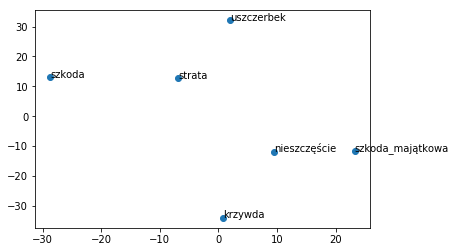

In [26]:
fig, ax = plt.subplots()
ax.scatter(vectors_transformed[:,0], vectors_transformed[:,1])

for i, txt in enumerate(words_to_plot):
    ax.annotate(txt, (vectors_transformed[:,0][i], vectors_transformed[:,1][i]))

plt.show()

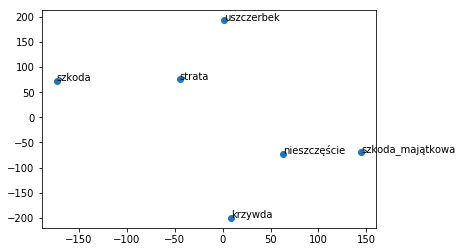

In [27]:
###
### just vectors to plot, without fitting all other vectors
###
tsne = TSNE(n_components=2, n_jobs=8)
vectors_to_plot = np.array([word2vec_model[word] for word in words_to_plot])
vectors_transformed = tsne.fit_transform(vectors_to_plot)
fig, ax = plt.subplots()
ax.scatter(vectors_transformed[:,0], vectors_transformed[:,1])

for i, txt in enumerate(words_to_plot):
    ax.annotate(txt, (vectors_transformed[:,0][i], vectors_transformed[:,1][i]))

plt.show()